#todo
-hyperparameter tuning
-cross validation
-label encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
!pip install tensorflow


In [3]:
import pickle
import joblib
from tensorflow.keras import models


ModuleNotFoundError: No module named 'tensorflow'

In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Kiranmayi\ML_CBP\Code\data.csv")
print(df.head(5))


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


# Data Preprocessing Part 1

In [11]:
df.shape

(10000, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [13]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [14]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
print("All customer IDs are unique") if df.customer_id.nunique()==df.shape[0] else print("Contains repeated values")

All customer IDs are unique


In [16]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

**Dropping customer_id as it does not contribute to the dataset**

In [17]:
df = df.drop(["customer_id"], axis=1)

In [18]:
df.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

**Check the number of unique value from all of the object datatype**

In [20]:
df.select_dtypes(include='object').nunique()

country    3
gender     2
dtype: int64

No need to drop any column because the number of unique features are minimum

# Exploratory Data Analysis


In [21]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
len(cat_vars)

#there are 2 cat columns

2

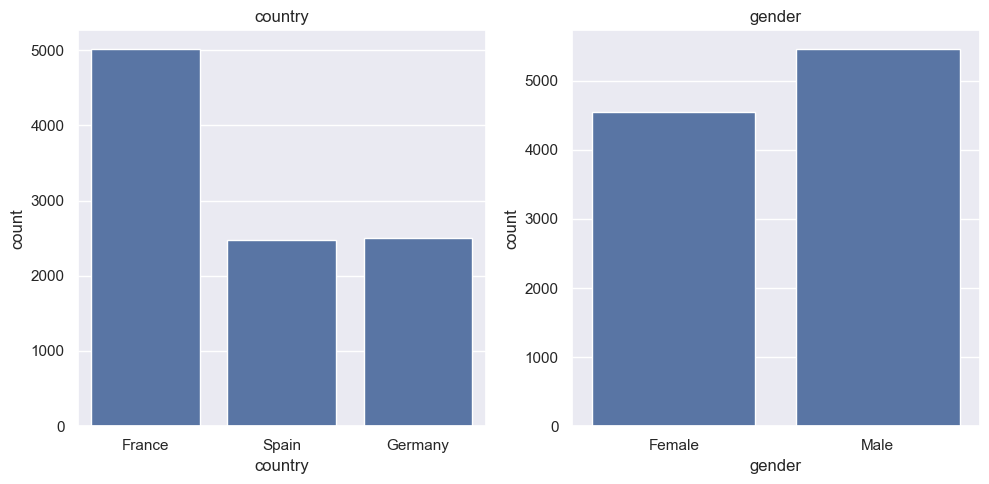

In [22]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3 #hard coded
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(3).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=0)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

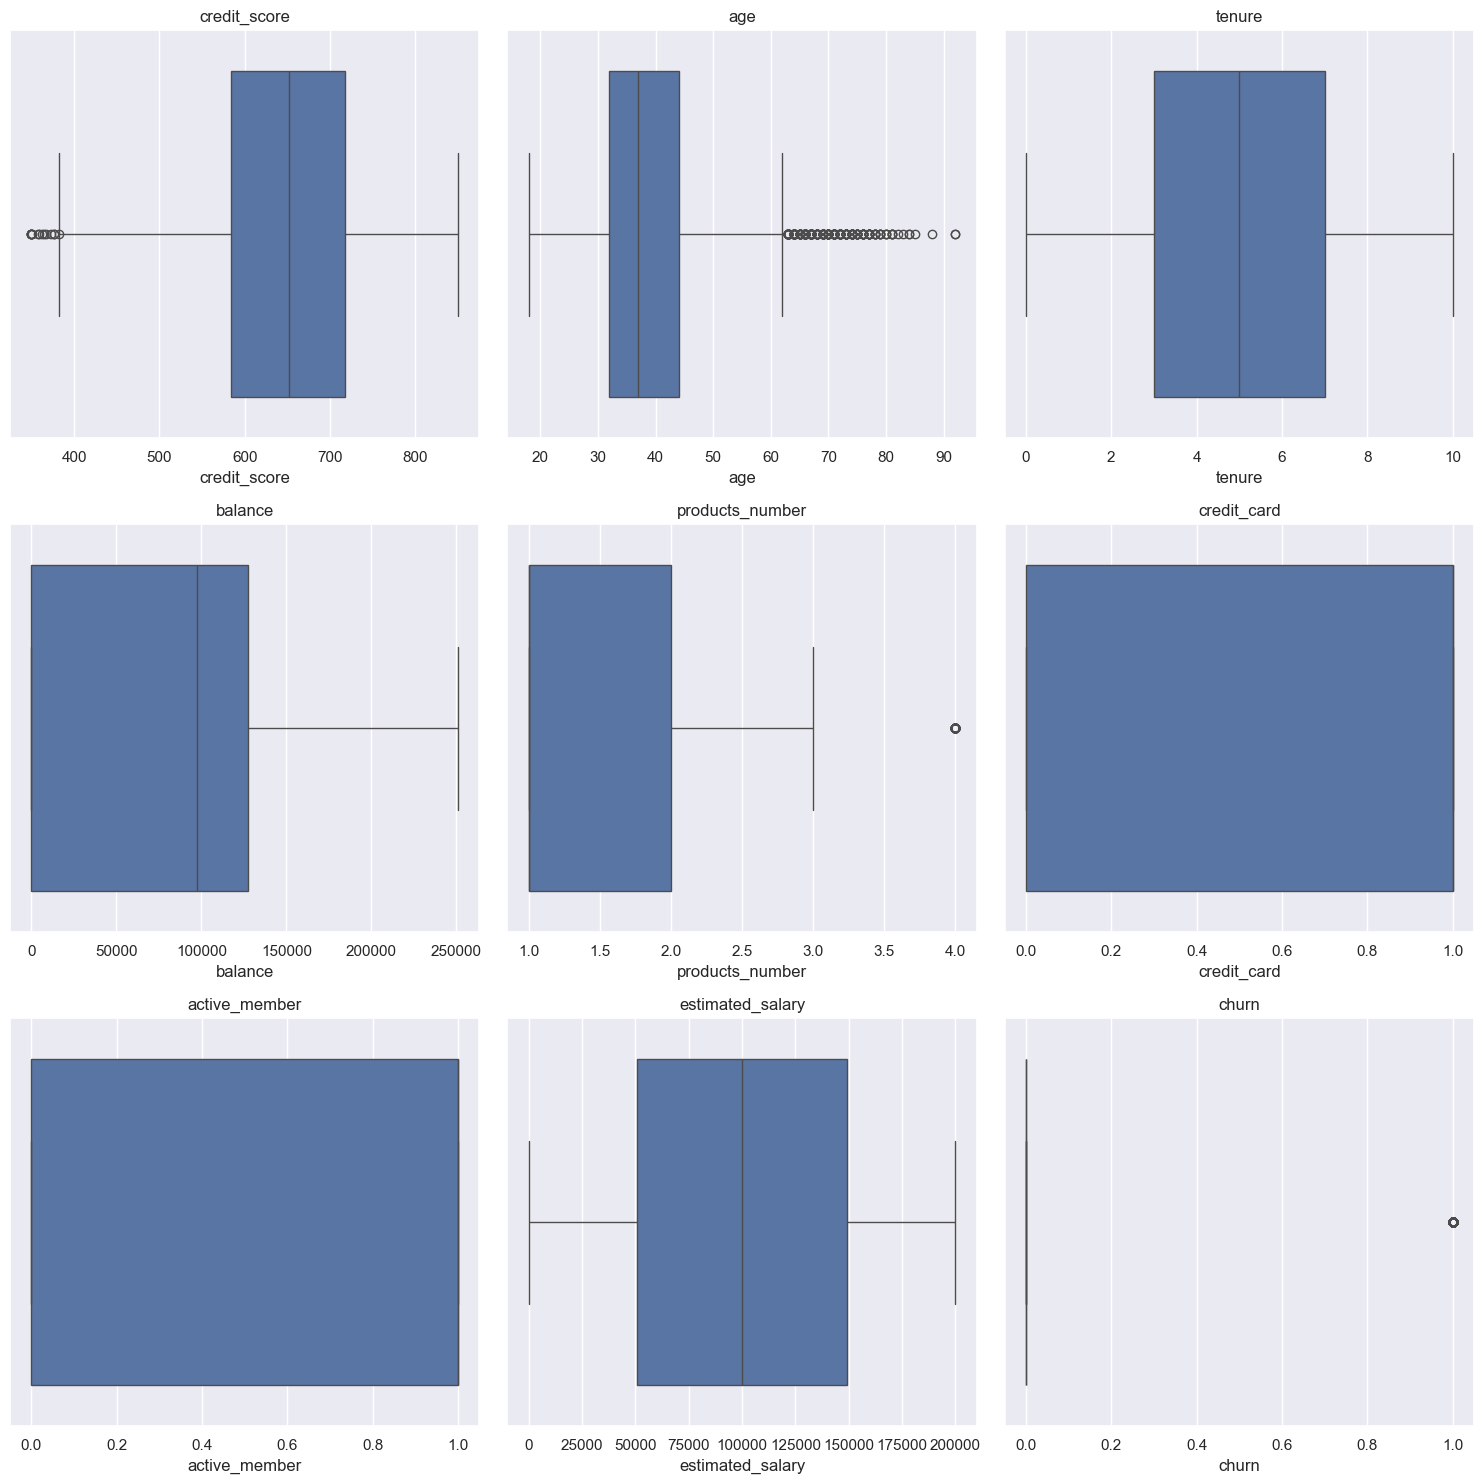

In [23]:
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

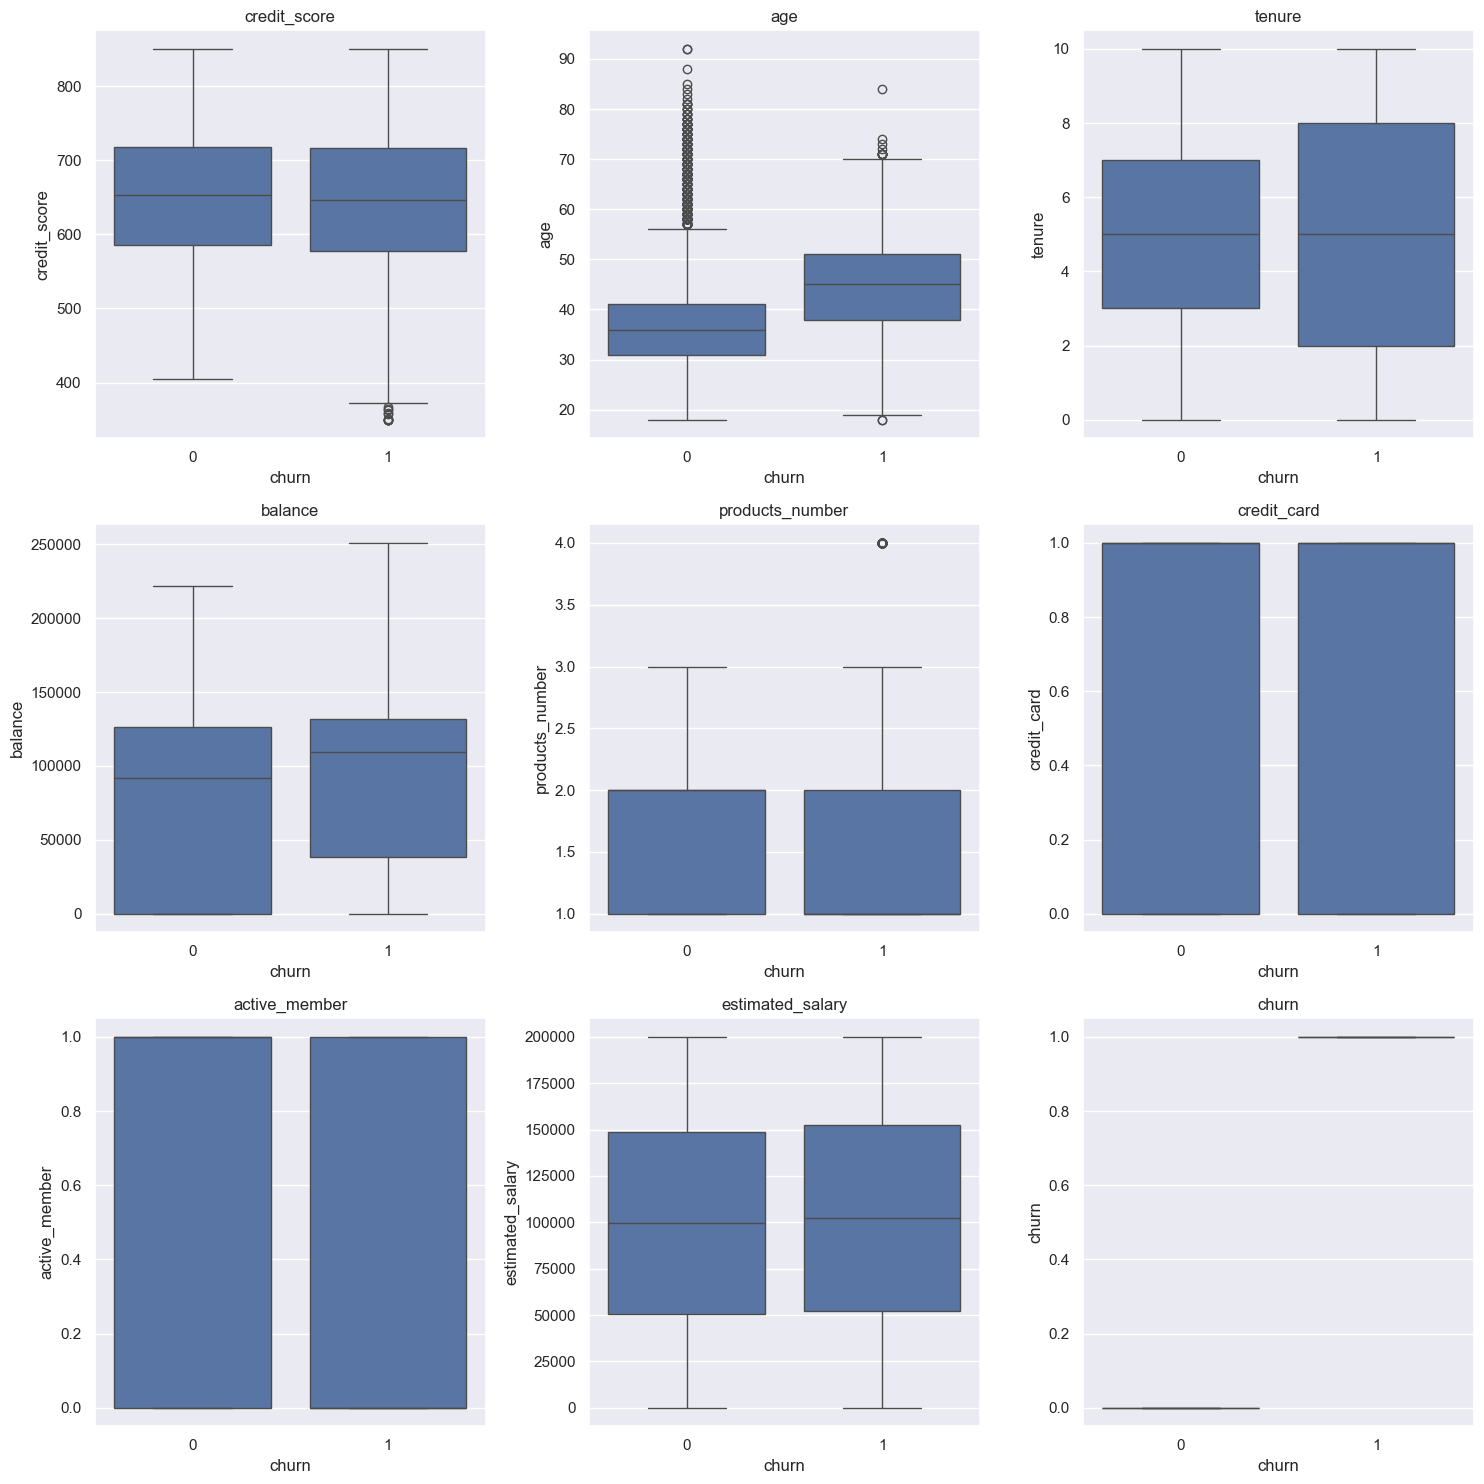

In [24]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='churn', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

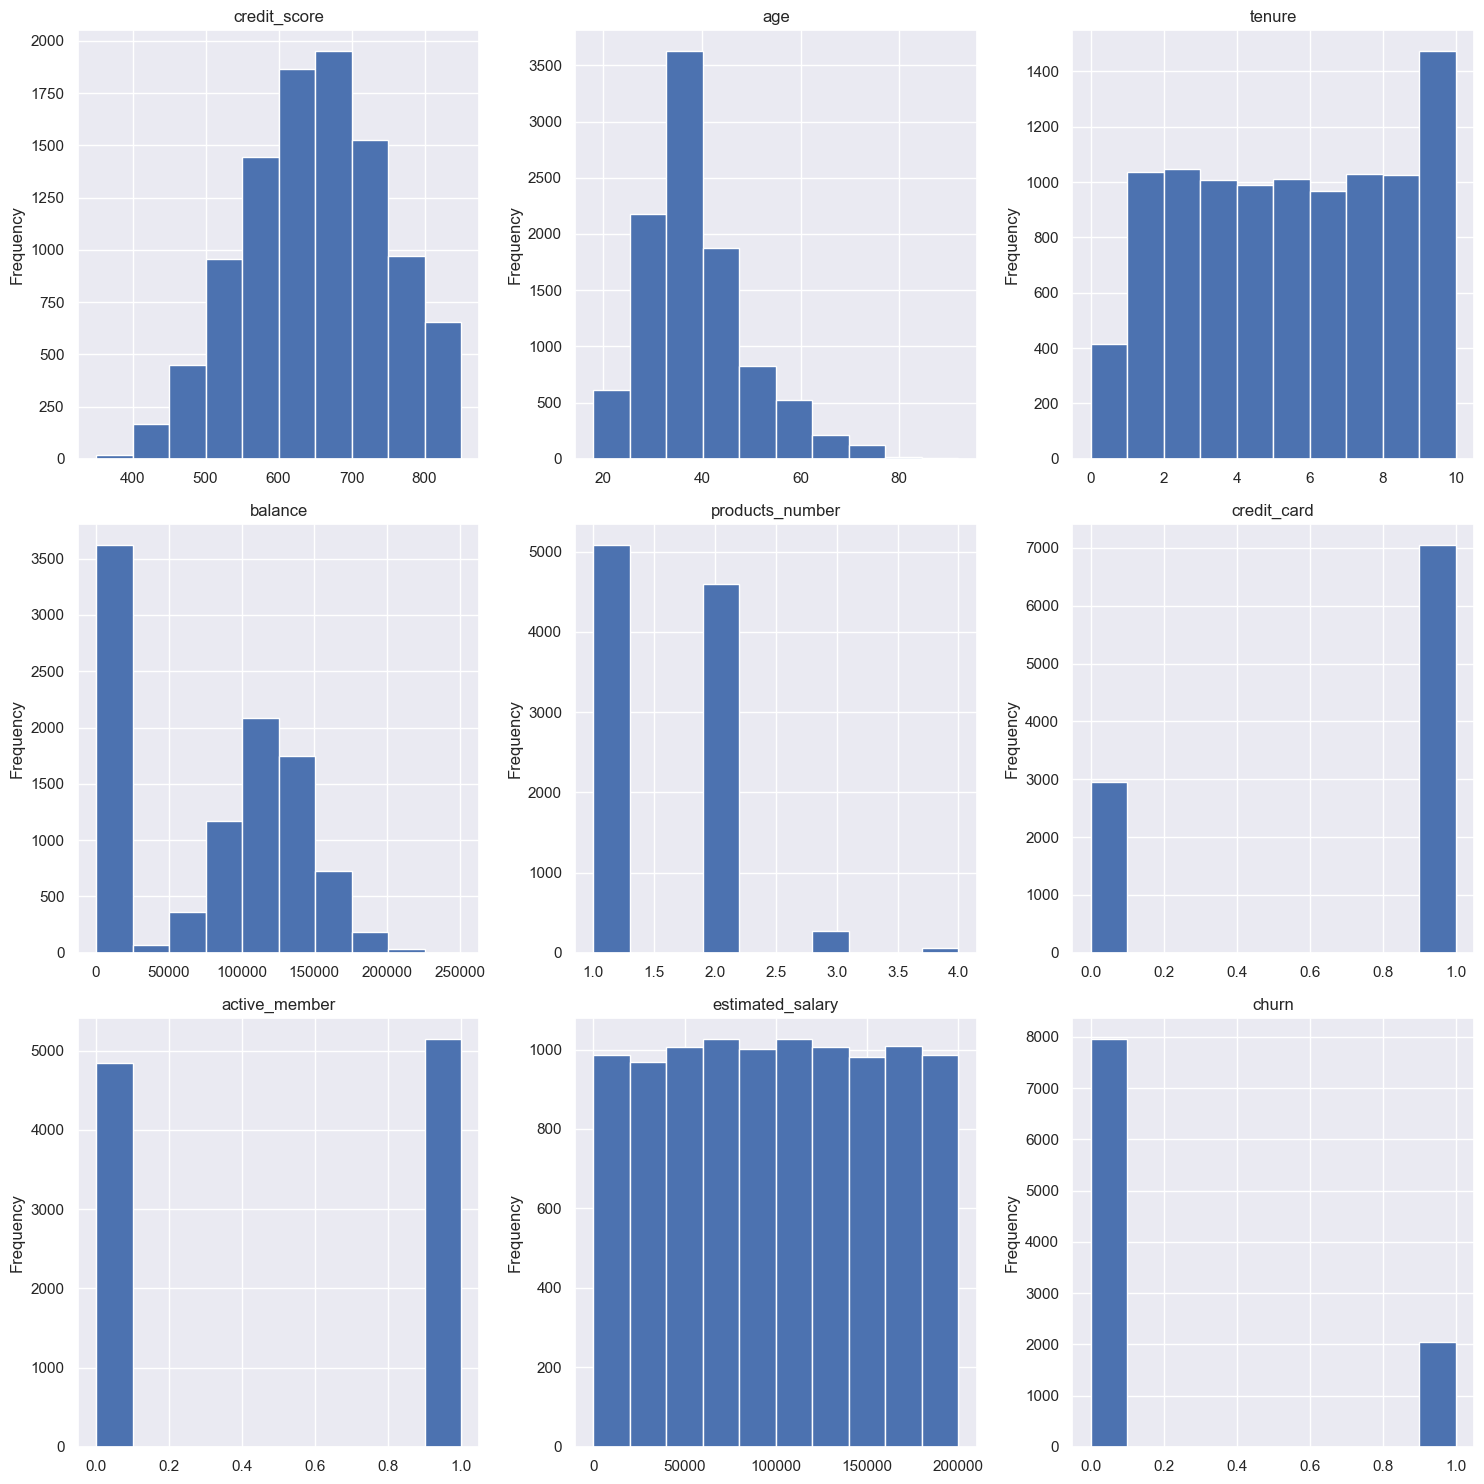

In [25]:
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i]fig.tight_layout()
plt.show()

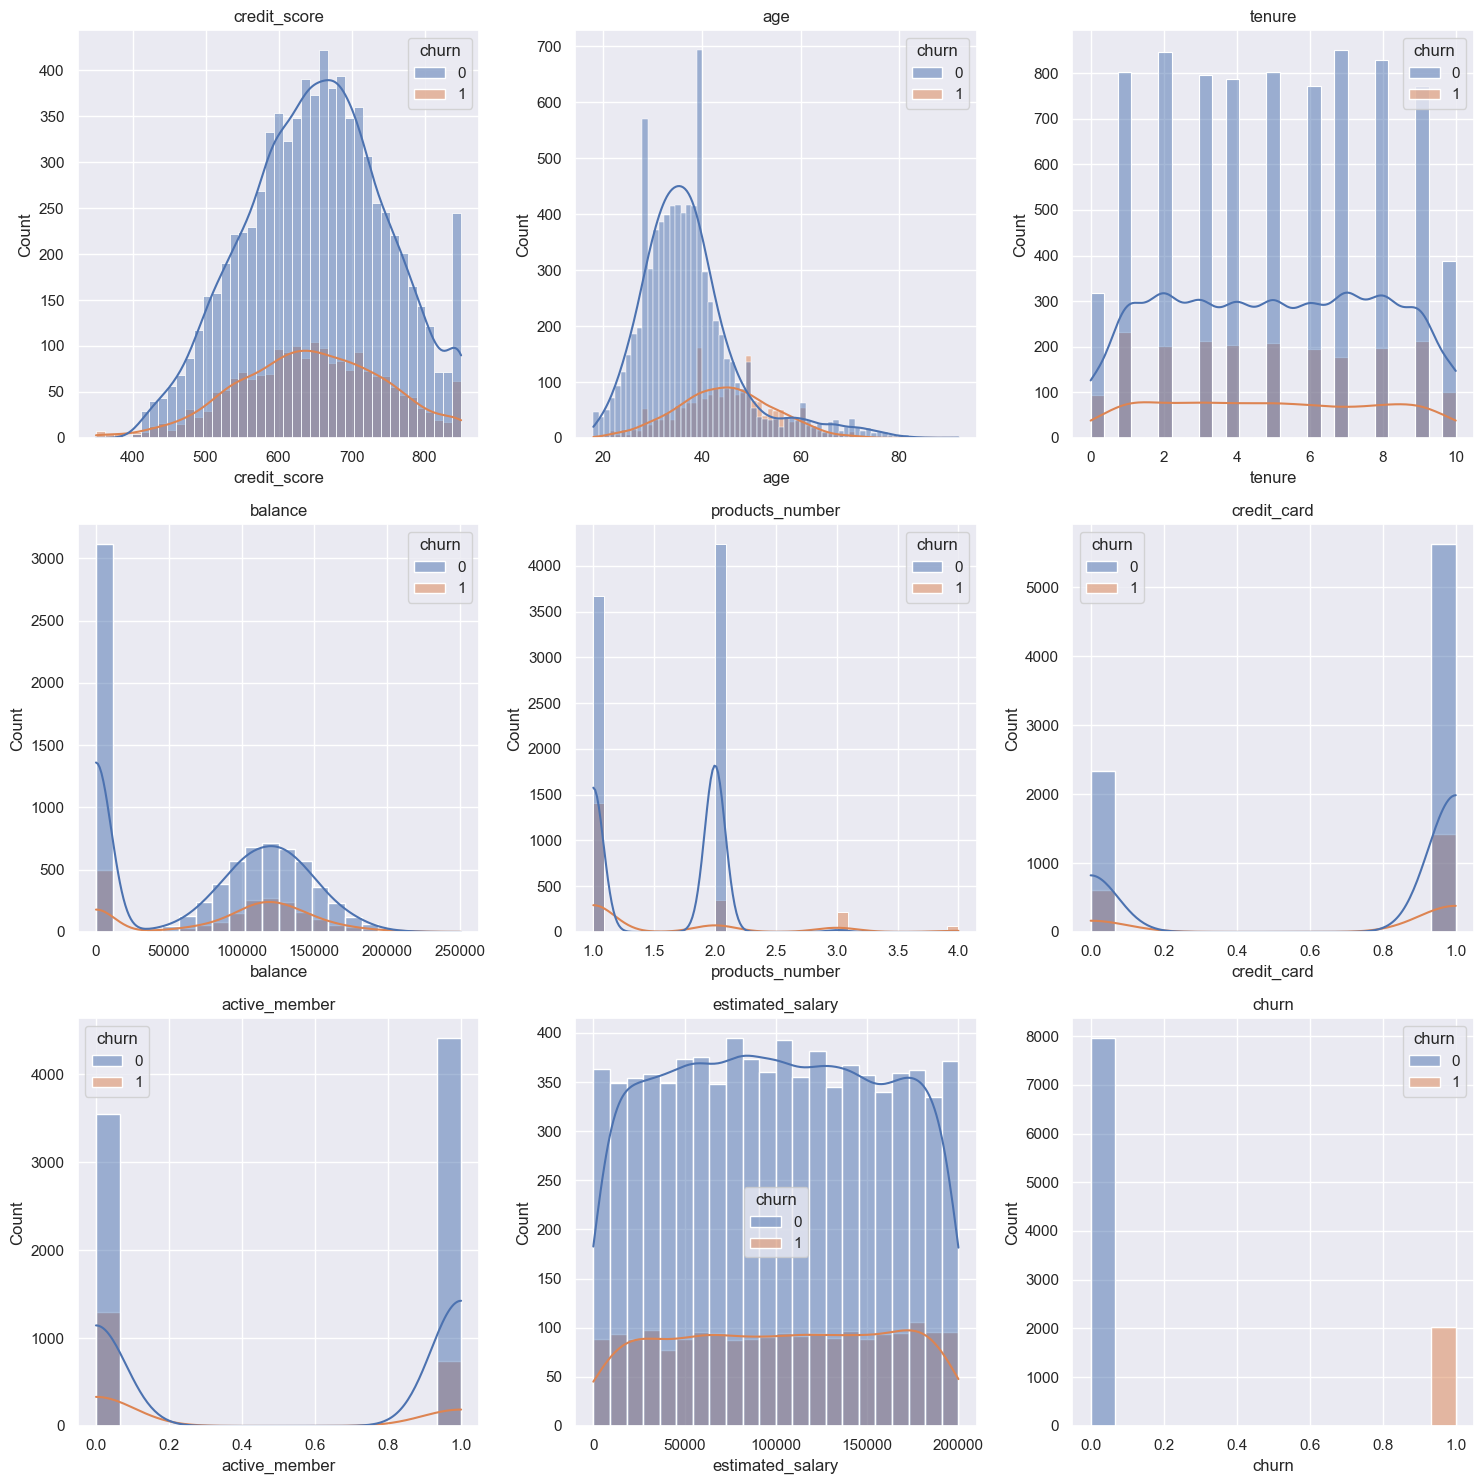

In [26]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var,
                 hue='churn', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

C:\Users\Kiranmayi\AppData\Local\Temp\ipykernel_17812\2190582174.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
C:\Users\Kiranmayi\AppData\Local\Temp\ipykernel_17812\2190582174.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


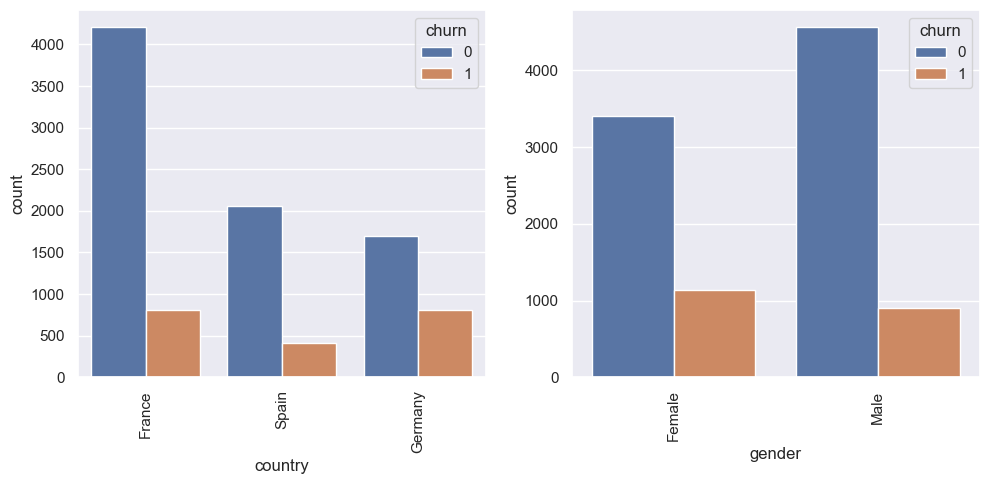

In [27]:
cat_vars = df.select_dtypes(include=['object']).columns.tolist()
if 'churn' in cat_vars:
    cat_vars.remove('churn')
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='churn', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])
fig.tight_layout()
plt.show()



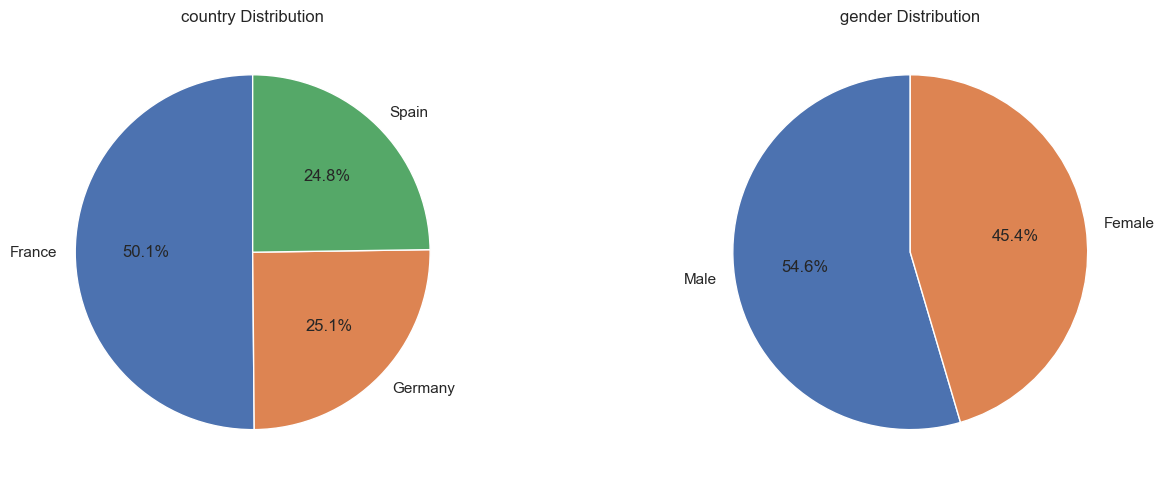

In [28]:
max_categories = 5
cat_cols = [col for col in df.columns if col != 'y' and df[col].dtype == 'object']
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))
axs = axs.flatten()
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = df[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
fig.tight_layout()
plt.show()

In [29]:
df.shape

(10000, 11)

<Axes: xlabel='churn', ylabel='count'>

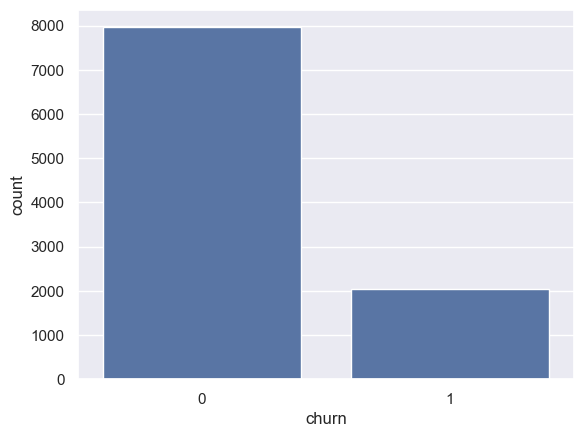

In [30]:
sns.countplot(data=df,x='churn')

# Label Encoding for Object Datatypes

In [31]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

country: ['France' 'Spain' 'Germany']
gender: ['Female' 'Male']


In [32]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")

country: [0 2 1]
gender: [0 1]


<Axes: >

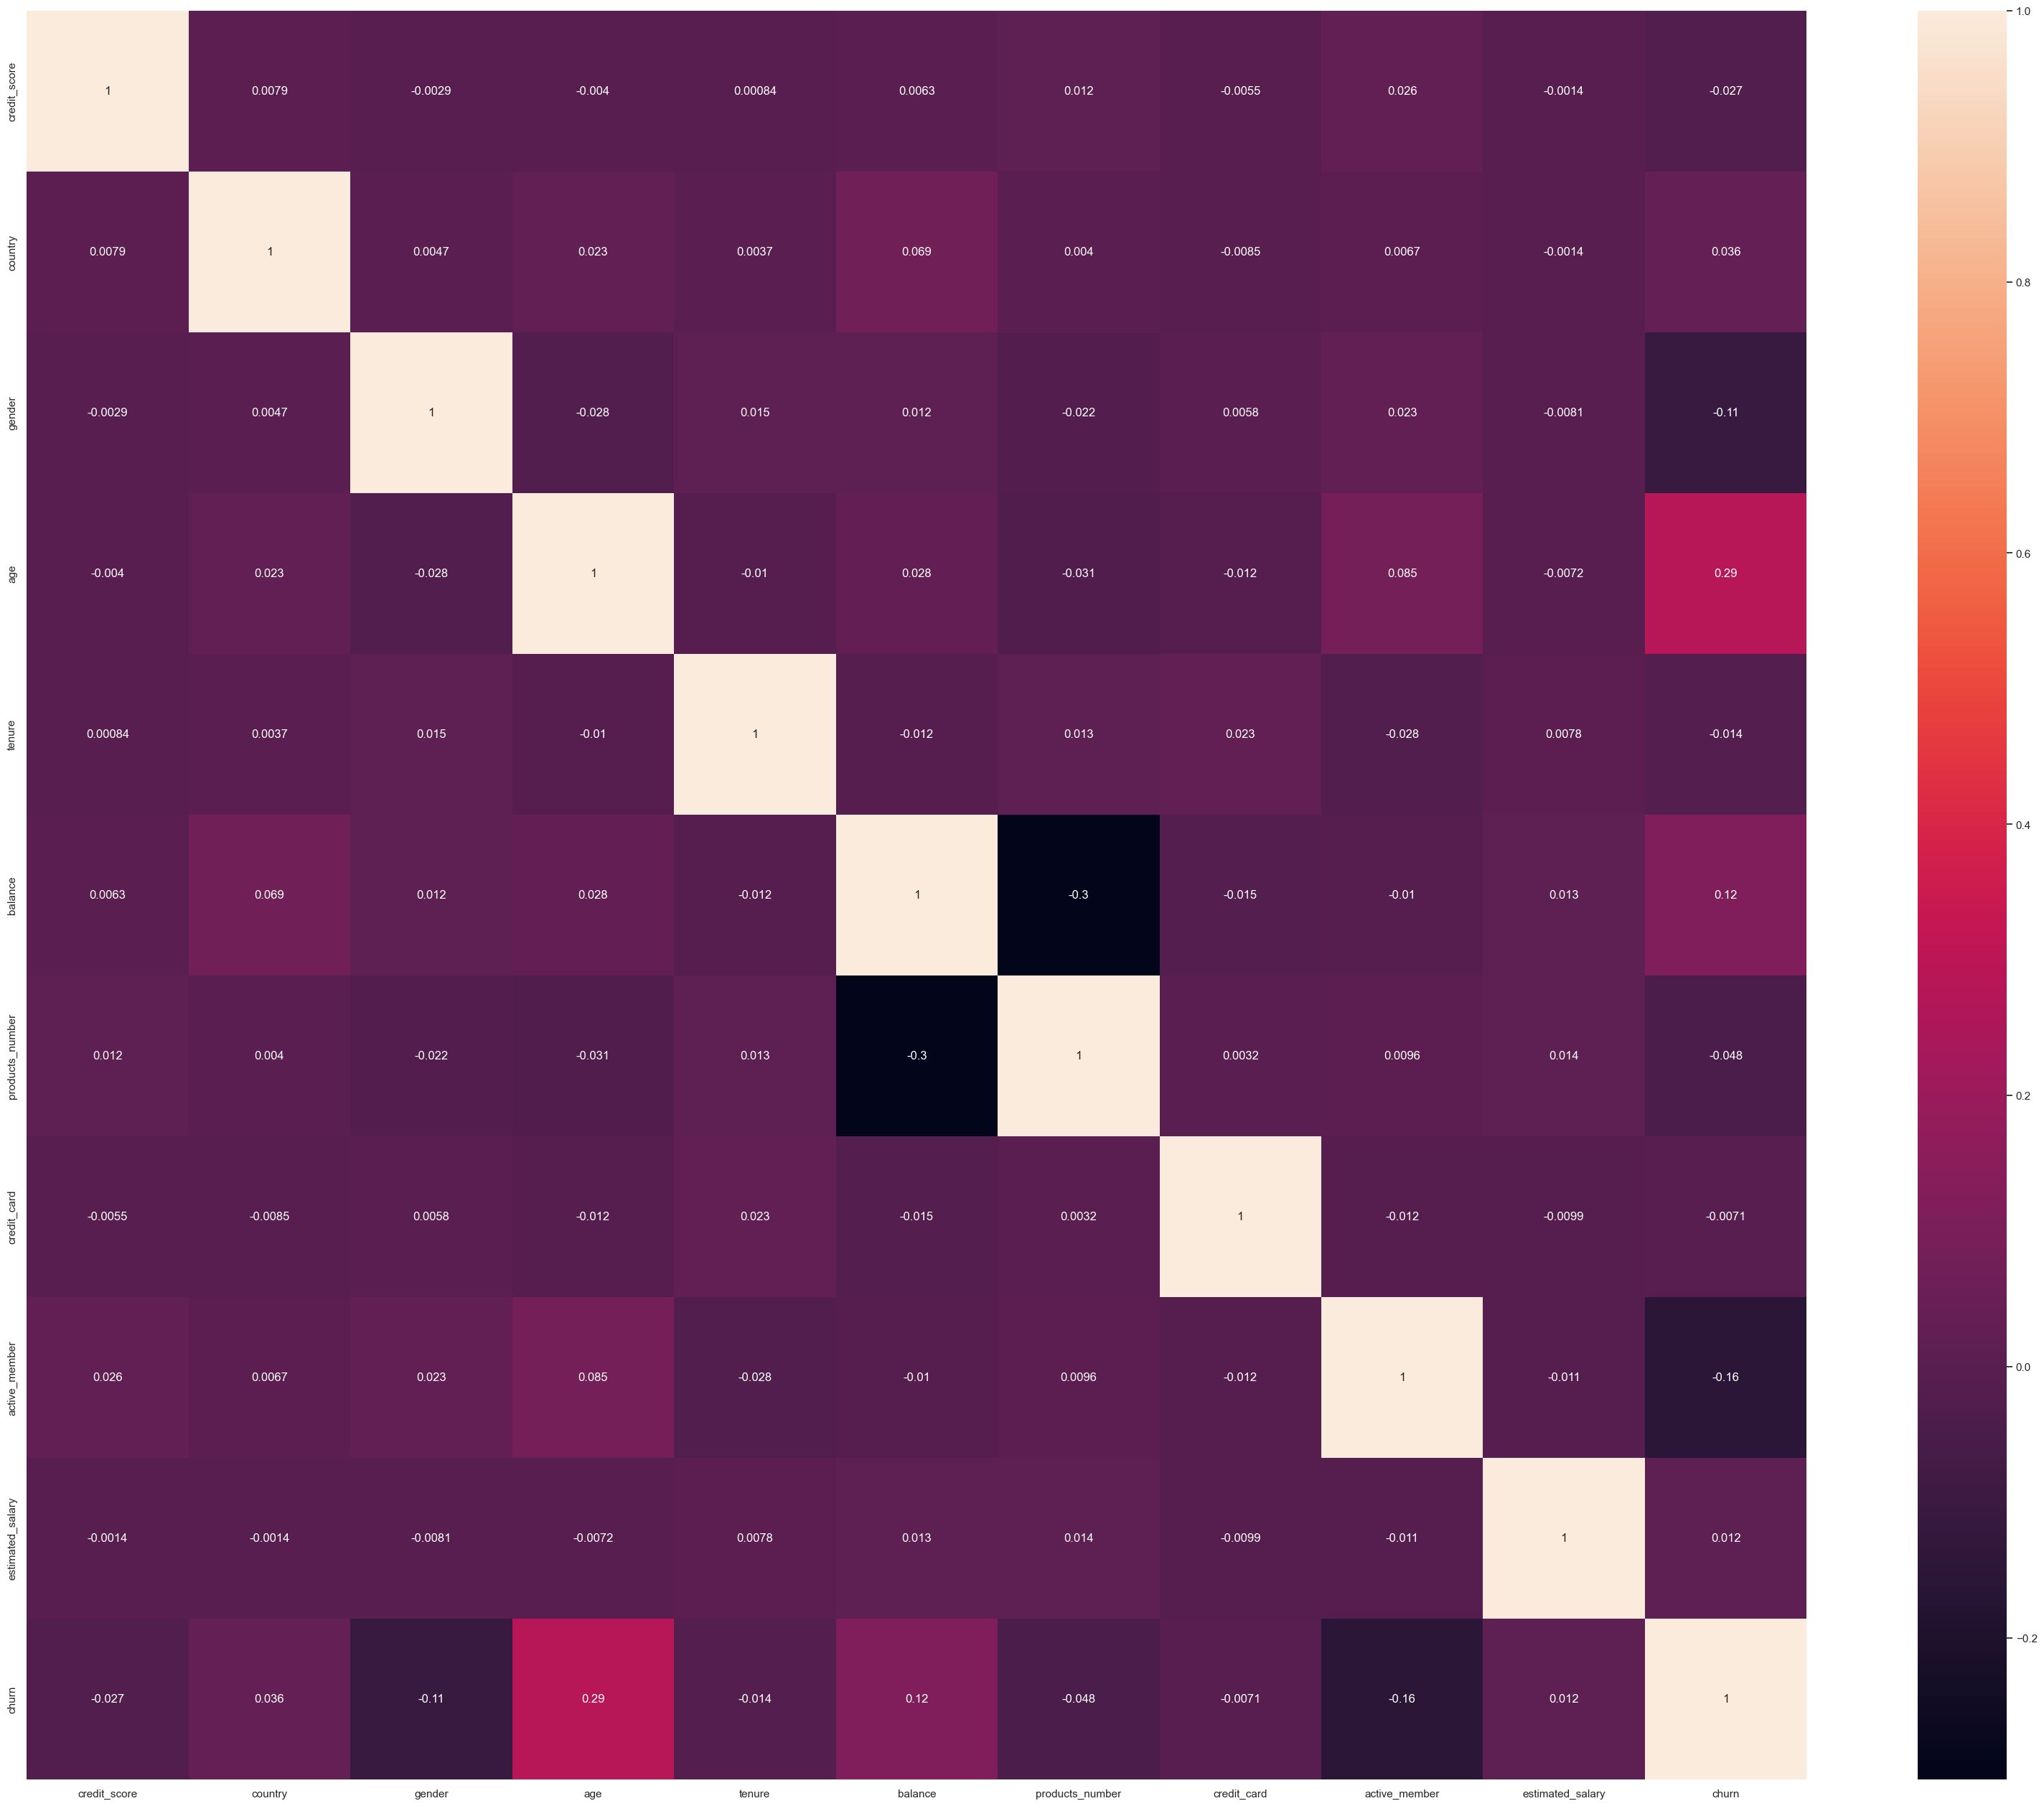

In [33]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

***=========================================================================***

In [34]:
X = df.drop('churn',axis=1)
y = df['churn']

In [35]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
!pip install imbalanced-learn


In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


In [39]:
y_res.value_counts()

churn
1    7963
0    7963
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3,random_state=1234)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11148, 10)
(4778, 10)
(11148,)
(4778,)


In [42]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 0.35649971 -0.9055496   0.91324755 ...  0.64920267  0.97481699
   1.36766974]
 [-0.20389777  0.30164867  0.91324755 ...  0.64920267  0.97481699
   1.6612541 ]
 [-0.96147213  1.50884694  0.91324755 ...  0.64920267 -1.02583358
  -0.25280688]
 ...
 [ 0.86500853 -0.9055496  -1.09499335 ... -1.54035103 -1.02583358
  -0.1427649 ]
 [ 0.15932282 -0.9055496   0.91324755 ...  0.64920267 -1.02583358
  -0.05082558]
 [ 0.47065475  0.30164867  0.91324755 ...  0.64920267  0.97481699
  -0.81456811]]


In [57]:
print(X_train.shape)
print(X_val.shape)


(800, 20)
(200, 20)


In [54]:
print(X_train.shape)  # Check training data shape
print(X_test.shape)   # Check test data shape


(8000, 10)
(2000, 10)


In [44]:
import tensorflow as tf
from tensorflow import keras

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(20,)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.20, epochs=100, callbacks=[es])


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.4912 - loss: 0.8673 - val_accuracy: 0.5063 - val_loss: 0.6925
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4729 - loss: 0.8715 - val_accuracy: 0.5063 - val_loss: 0.6925
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4763 - loss: 0.8128 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5126 - loss: 0.7347 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5586 - loss: 0.7393 - val_accuracy: 0.4875 - val_loss: 0.6937
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5478 - loss: 0.7221 - val_accuracy: 0.5188 - val_loss: 0.6936
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5081 - loss: 0.7416 - val_accuracy: 0.5375 - val_loss: 0.6938
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5265 - loss: 0.7218 - val_accuracy: 0.

C:\Users\Kiranmayi\desktop\ML_sample\env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.4403 - loss: 1.1009 - val_accuracy: 0.5887 - val_loss: 0.6861
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5464 - loss: 0.8107 - val_accuracy: 0.7518 - val_loss: 0.5935
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6533 - loss: 0.6351 - val_accuracy: 0.8582 - val_loss: 0.5219
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7309 - loss: 0.5365 - val_accuracy: 0.9007 - val_loss: 0.4660
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7851 - loss: 0.4613 - val_accuracy: 0.8936 - val_loss: 0.4198
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8215 - loss: 0.4259 - val_accuracy: 0.9007 - val_loss: 0.3793
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8441 - loss: 0.3603 - val_accuracy: 0.9433 - val_loss: 0.3418
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8038 - loss: 0.3981 - val_accuracy: 0.

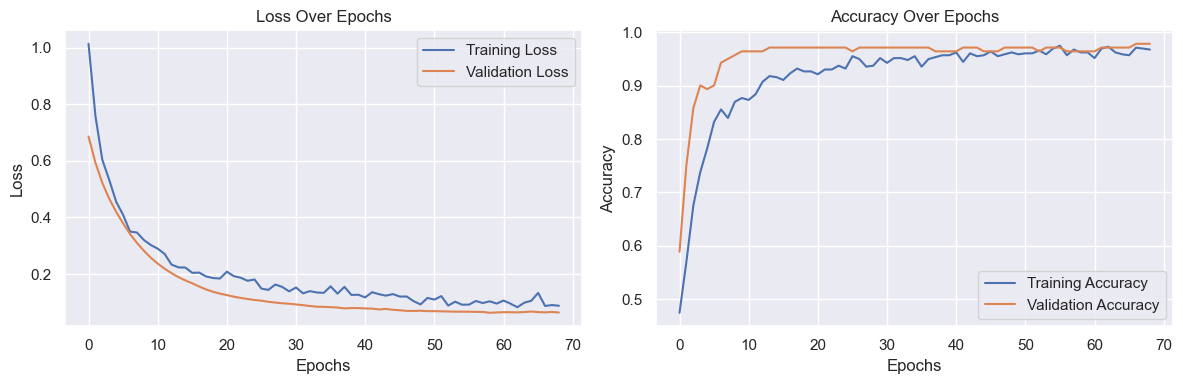

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 1. Create meaningful synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, 
                           n_redundant=2, n_clusters_per_class=1, random_state=42)

# 2. Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1234)

# 4. Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Build the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(20,)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# 7. Early stopping
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 8. Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[es], verbose=1)

# 9. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# 10. Classification report
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# 11. Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [74]:
model.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9612 - loss: 0.0668 


[0.06547880172729492, 0.9668874144554138]

In [75]:
yp = model.predict(X_test)
yp[:5]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[7.7649180e-05],
       [9.9980092e-01],
       [9.7629976e-01],
       [1.4164886e-03],
       [1.1591908e-01]], dtype=float32)

In [76]:
y_test[:10]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [77]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [78]:
y_pred[:10]

[0, 1, 1, 0, 0, 0, 1, 1, 1, 1]

In [79]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       151
           1       0.97      0.97      0.97       151

    accuracy                           0.97       302
   macro avg       0.97      0.97      0.97       302
weighted avg       0.97      0.97      0.97       302



Text(92.25, 0.5, 'Actual')

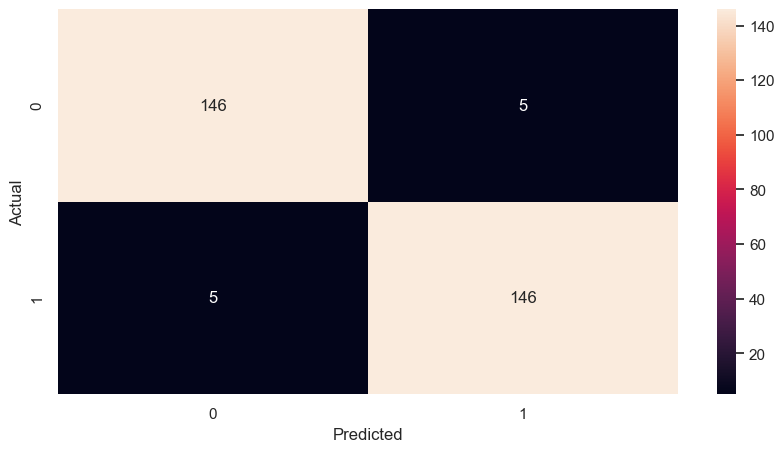

In [80]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [81]:
(1532+101)/(1532+311+56+101)

0.8165

In [82]:
from keras.models import load_model

# Assuming model is already trained
model.save('ANNnew.keras')

# To load the saved model



**Decision Tree**

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 96.35761589403974 %


**Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 95.69536423841059 %


**SVM**

In [85]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 97.35099337748345 %


**XG Boost**

In [87]:
!pip install xgboost

  Using cached xgboost-3.0.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.1-py3-none-win_amd64.whl (150.0 MB)


In [88]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 96.35761589403974 %


**Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy**

In [89]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))


Classification report - n               precision    recall  f1-score   support

           0       0.97      0.95      0.96       151
           1       0.95      0.97      0.96       151

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302



In [90]:
from sklearn.metrics import roc_curve

# Now you can use roc_curve function without error


accuray is: 96.03
F1 is: 0.96
Precision is: 0.96
Recall is: 0.96


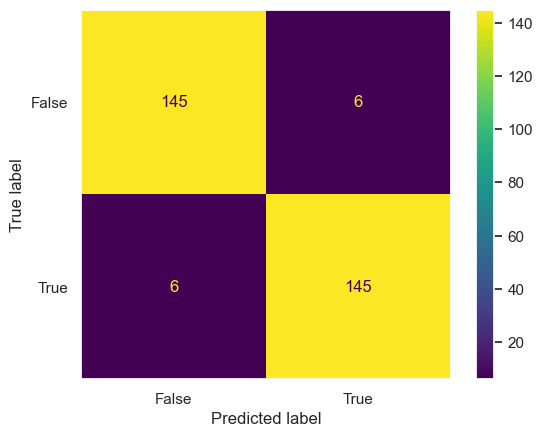

True negative: 145
False postive: 6
False negative: 6
True postive: 145


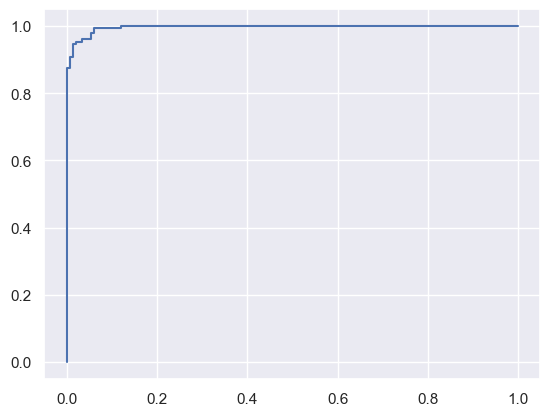

In [91]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

# =============================Predictions============================================================

y_pred_log=logtree.predict(X_test)

# ============================ Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:"
      ,f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

# ================================Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================
y_dt_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

accuray is: 96.03
F1 is: 0.96
Precision is: 0.94
Recall is: 0.98


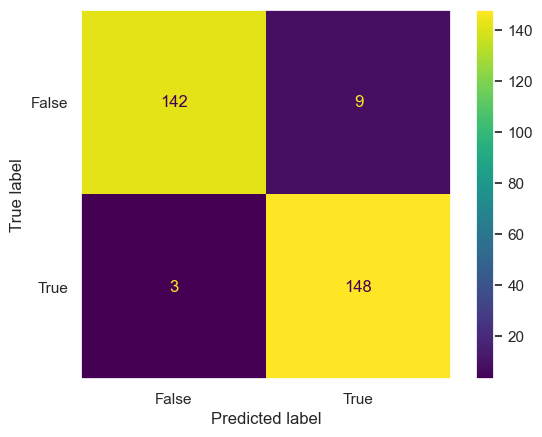

True negative: 142
False postive: 9
False negative: 3
True postive: 148


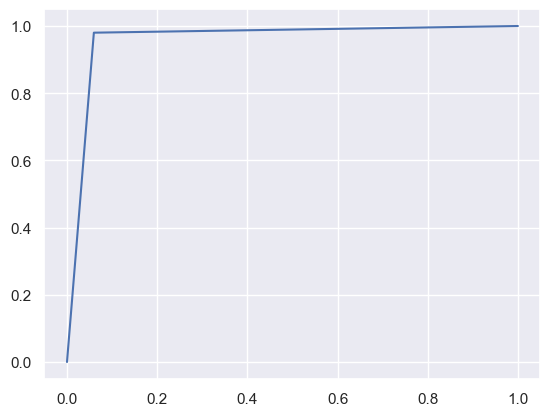

In [92]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# =============================Predictions============================================================

y_pred_dt=dtree.predict(X_test)

# ============================ Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)

# ================================Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

accuray is: 91.72
F1 is: 0.91
Precision is: 0.98
Recall is: 0.85


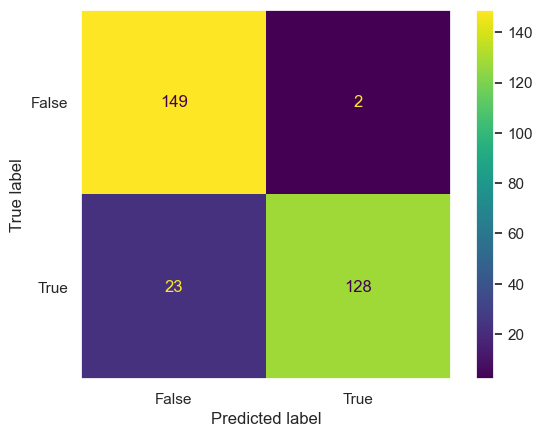

True negative: 149
False postive: 2
False negative: 23
True postive: 128


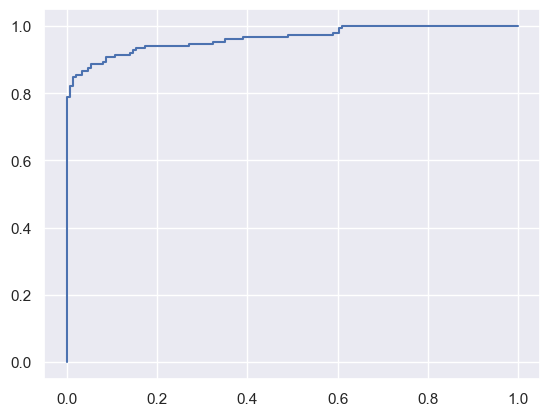

In [93]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

# =============================Predictions============================================================

y_pred_NB=NBtree.predict(X_test)

# ============================ Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

# ================================Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================ROC-AUC curve================================================================

y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob)
plt.plot(fpr,tpr)
plt.show()

accuray is: 93.71
F1 is: 0.94
Precision is: 0.96
Recall is: 0.91


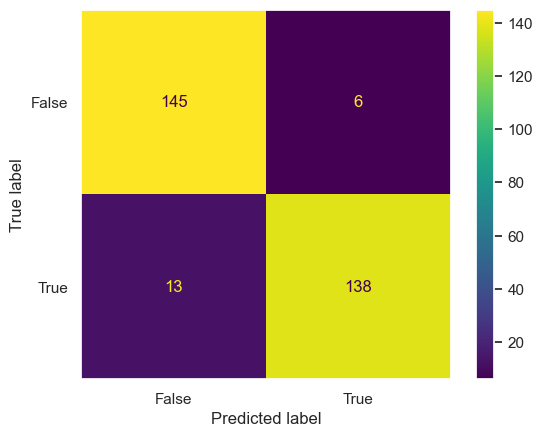

True negative: 145
False postive: 6
False negative: 13
True postive: 138


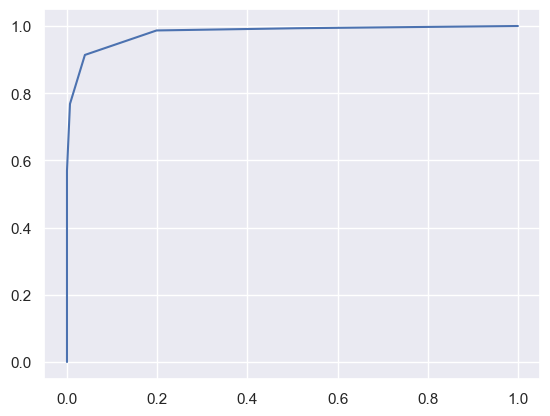

In [94]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

# ============================= Predictions============================================================

y_pred_KNN=KNNtree.predict(X_test)

# ============================ Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

# ================================Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================ROC-AUC curve================================================================

y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob)
plt.plot(fpr,tpr)
plt.show()

accuray is: 97.02
F1 is: 0.97
Precision is: 0.97
Recall is: 0.97


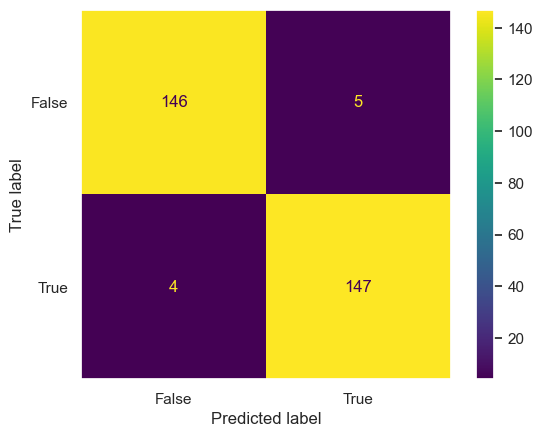

True negative: 146
False postive: 5
False negative: 4
True postive: 147


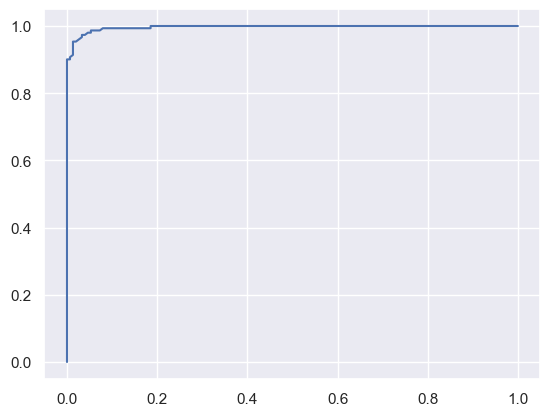

In [95]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob)
plt.plot(fpr,tpr)
plt.show()


In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2=svm.predict(X_test)
accuracy_score(y_test, y_pred2)
precision_score(y_test, y_pred2)
recall_score(y_test, y_pred2)
f1_score(y_test,y_pred2)

0.9735099337748344

In [98]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]
      }

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])


,Accuracy,Precision,Recall,F1-score
DT,96.03,0.94,0.98,0.96
KNN,93.71,0.96,0.91,0.94
Logistic,96.03,0.96,0.96,0.96
Naive Bayes,91.72,0.98,0.85,0.91
Random Forest,97.02,0.97,0.97,0.97


In [99]:
from tensorflow.keras.models import load_model, save_model

# Assuming 'model' is your Keras model
model.save('logtree.keras')
model.save('NBtree.keras')
model.save('KNNtree.keras')

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=3,
                       random_state=42)

In [101]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.69 %


In [102]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9668874172185431
Precision Score :  0.9668874172185431
Recall Score :  0.9668874172185431
Jaccard Score :  0.9358974358974359
Log Loss :  1.1934984565932836


Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.9668874172185431')

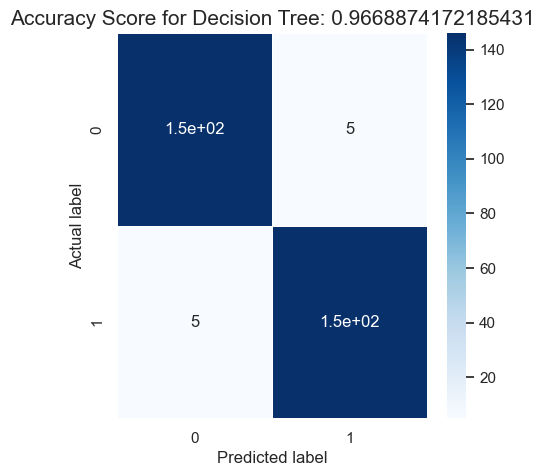

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

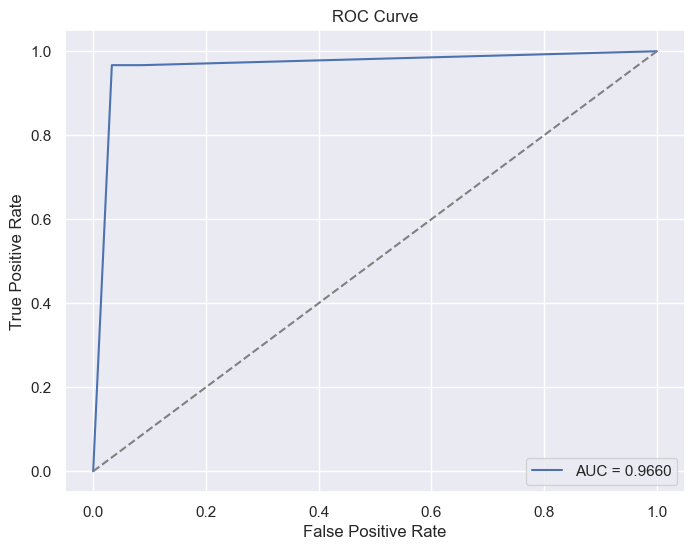

In [105]:
# from sklearn.metrics import roc_curve, roc_auc_score
# y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

# df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
# df_actual_predicted.index = y_test.index

# fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
# auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
# plt.plot(fpr, fpr, linestyle = '--', color='k')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve', size = 15)
# plt.legend()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Ensure you have a classifier already trained, e.g., dtree = DecisionTreeClassifier().fit(X_train, y_train)

# Predict probabilities for the positive class (1)
y_pred_proba = dtree.predict_proba(X_test)[:, 1]  # corrected indexing

# Ensure y_test is a pandas Series with index
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred_proba).reset_index(drop=True)

# Combine actual and predicted probabilities into a DataFrame
df_actual_predicted = pd.concat([
    pd.DataFrame({'y_actual': y_test_series}),
    pd.DataFrame({'y_pred_proba': y_pred_series})
], axis=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc_score = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
joblib.dump(dtree,'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features=None, n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=200, random_state=42)

In [108]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.36 %


In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9635761589403974
Precision Score :  0.9635761589403974
Recall Score :  0.9635761589403974
Jaccard Score :  0.9297124600638977
Log Loss :  1.3128483022526118


In [123]:
# joblib.dump(rfc,'random_forest.pkl')
# Correct way to save with pickle
import pickle

with open("random_forest.pkl", "wb") as f:
    pickle.dump(rfc, f)


In [111]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [112]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.69 %


In [113]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9668874172185431
Precision Score :  0.9668874172185431
Recall Score :  0.9668874172185431
Jaccard Score :  0.9358974358974359
Log Loss :  1.1934984565932836


Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.8415655085809962')

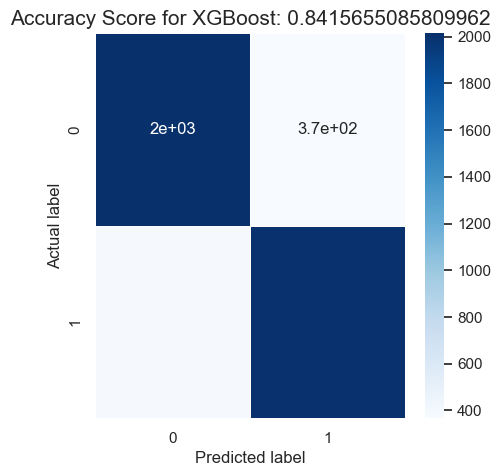

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

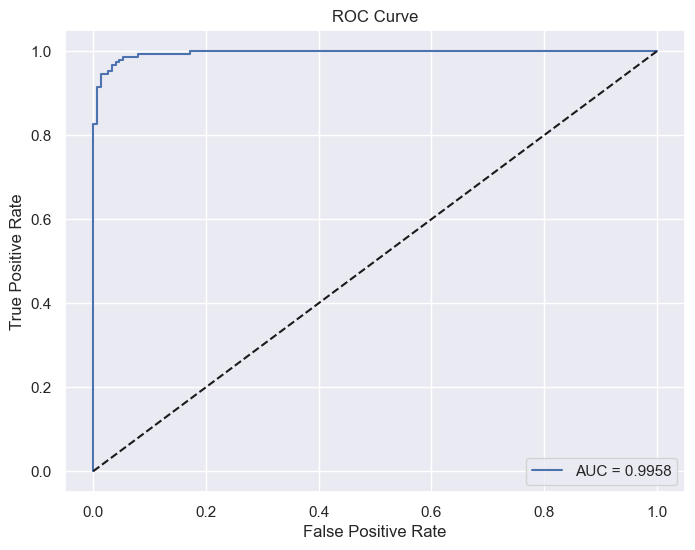

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Convert y_test to pandas Series if it isn't already, reset index to avoid misalignment
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred_proba).reset_index(drop=True)

# Combine actual and predicted probabilities
df_actual_predicted = pd.concat([
    pd.DataFrame({'y_actual': y_test_series}),
    pd.DataFrame({'y_pred_proba': y_pred_series})
], axis=1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
joblib.dump(xgb,'xgb.pkl')

['xgb.pkl']

In [117]:
import joblib
import numpy as np

# Load the saved Random Forest model
rf_model = joblib.load('random_forest.pkl')

In [118]:
import joblib
import numpy as np

# Load the saved Random Forest model
joblib.dump(model,'ANNnew.pkl')

['ANNnew.pkl']

In [120]:
# # Example: Your input should be a list with 20 features, e.g.
input_features = [619,1,2,42,2,0,1,1,1,101348.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

prediction = dtree.predict([input_features])
print(prediction)


[1]


In [121]:
print("Prediction:", prediction)
new_data = np.array([[619,1,2,42,2,0,1,1,1,101348.9]])
# If the model predicts probabilities, you can also get the prediction probabilities
prediction_proba = dtree.predict_proba(new_data)
print("Prediction probabilities:", prediction_proba)

Prediction: [1]


ValueError: X has 10 features, but DecisionTreeClassifier is expecting 20 features as input.